# Welcome to the Legacy Immersion Weekend Mini-Hackathon and Scavenger Hunt!

This notebook will walk you through a simple computer vision challenge lovingly and painstakingly designed by your dedicated event organizers.

The dataset consists of architectural images from around Chicago. When you download the dataset it will already be split into training and validation sets, and each dataset's directory will be further broken down by image label ("1" representing the positive class and "0" representing the negative class).

Your task is to build a computer vision model that can distinguish between these two classes, and use it to extract the images containing your scavenger hunt clues from the test dataset.

## Setup:
Run these first two cells to download and unzip the dataset, and to pre-load some libraries and APIs that will be useful for this challenge.

Note: Before you begin, make sure that your colab session is connected to a GPU-enabled runtime (ideally an A100 if available). This challenge will take more time than we have available if you run it on a CPU runtime.

In [ ]:
#!pip install requests
import requests
import shutil
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D

from tqdm.keras import TqdmCallback
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# Download the dataset file from huggingface and unzip:
dataset_id = "SVeldman/cv_challenge_9_21_24"
filename = "cv_challenge_dataset.zip"

url = f"https://huggingface.co/datasets/{dataset_id}/resolve/main/{filename}"

response = requests.get(url)
response.raise_for_status()  # Raise an exception for non-200 status codes

with open(filename, "wb") as f:
    f.write(response.content)

!unzip cv_challenge_dataset.zip

source_path = '/content/content/dataset'
destination_path = '/content/dataset'

if os.path.exists(source_path):
  shutil.move(source_path, destination_path)

shutil.rmtree('/content/content')

## Instantiate Dataset Objects:

Use the Keras API to create datasets "train" and "val" from the two folders inside the dataset directory.

(hint: https://keras.io/api/data_loading/image/)

In [ ]:
# define training dataset:
train = # insert your code here

# define validation dataset:
val = # insert your code here

## Load a Pretrained Model:
Use the Keras API to load a pretrained image classification model from Keras Applications (https://keras.io/api/applications/).

Do not include the top layer of the base model, and make sure the base model is initially set to not be trainable ("model.trainable = False"). After that, you may unfreeze as many layers of the base model as you would like.

(hint: click on the link for the model you want to use for more information on the arguments available when loading that model.)

In [ ]:
base_model = # insert your code here
base_model.trainable = False

# unfreeze layers if desired:
# insert your code here

## Add Additional Layers and Compile:

At a minimum, you will need to add an output layer to your base model (this should be a dense layer with two neurons and a sigmoid activation function). You may choose to add additional layers between the base model and the output layer if you would like.

Once you have defined your model, compile it.

(https://keras.io/api/models/model_training_apis/#compile-method)

In [ ]:
# Add additional layers to base model:
transfer_model = Sequential([
    base_model,
    # insert additional code here if desired,
    Dense(2, activation='sigmoid')
])

# Compile the model:
transfer_model.compile(# insert your code here)

## Train your model using the train and validation datasets

A validation accuracy of 90% should get you *most* of the clues, but time will be added to your team's scavenger hunt time for every clue your model fails to predict (or extra clue it predicts). Can you beat Steve's validation accuracy of 96.32%?

(https://keras.io/api/models/model_training_apis/#fit-method)

In [ ]:
# Train your model:
transfer_model.fit(# insert your code here)

# Unlock the Scavenger Hunt Clues!
Use the code below to download the test dataset. Run inference using your best model, and then use the final code cell to print the images that your model believes are the scavenger hunt clues.

In [ ]:
# Download the dataset file from huggingface and unzip:
dataset_id = "SVeldman/cv_challenge_9_21_24"
filename = "test_dataset.zip"

url = f"https://huggingface.co/datasets/{dataset_id}/resolve/main/{filename}"

response = requests.get(url)
response.raise_for_status()  # Raise an exception for non-200 status codes

with open(filename, "wb") as f:
    f.write(response.content)

!unzip test_dataset.zip

source_path = '/content/content/test_dataset'
destination_path = '/content/test_dataset'

if os.path.exists(source_path):
  shutil.move(source_path, destination_path)

shutil.rmtree('/content/content')

Archive:  test_dataset.zip
   creating: content/test_dataset/
  inflating: content/test_dataset/cobb_gate.png  
  inflating: content/test_dataset/bottany_pond_bridge.png  
  inflating: content/test_dataset/harper_library.png  
  inflating: content/test_dataset/nuclear_energy_sculpture.png  
  inflating: content/test_dataset/rubenstein_forum.png  
  inflating: content/test_dataset/bond_chapel.png  
  inflating: content/test_dataset/law_school.png  
  inflating: content/test_dataset/lumen_christi.png  
  inflating: content/test_dataset/booth.png  
  inflating: content/test_dataset/hutchinson_courtyard.png  
  inflating: content/test_dataset/robie_house.png  
  inflating: content/test_dataset/mansueto.png  
  inflating: content/test_dataset/rockefeller_chapel.jpg  
  inflating: content/test_dataset/crown_fieldhouse.png  
  inflating: content/test_dataset/von_linne_monument.png  
  inflating: content/test_dataset/harris.png  
  inflating: content/test_dataset/hull_gate.jpg  
  inflating: c

In [ ]:
test = keras.utils.image_dataset_from_directory(
    "/content/test",
    labels=None,
    label_mode=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=47,
    interpolation="bilinear",
    #follow_links=False,
    pad_to_aspect_ratio=True
)

Found 18 files.


In [ ]:
# Designate your model as "my_model":
my_model = transfer_model
my_model.load_weights("tr_model_20_epochs.keras")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


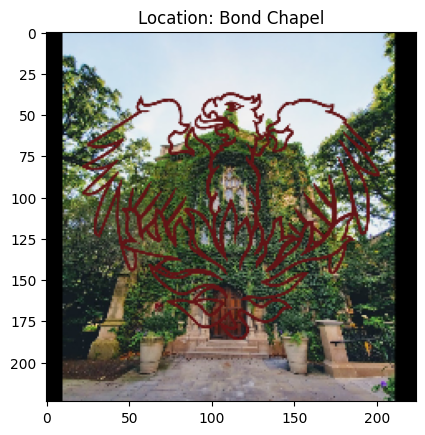

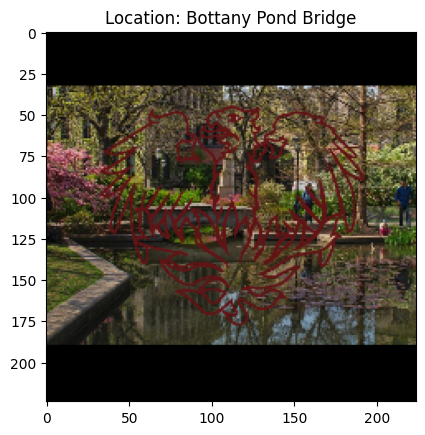

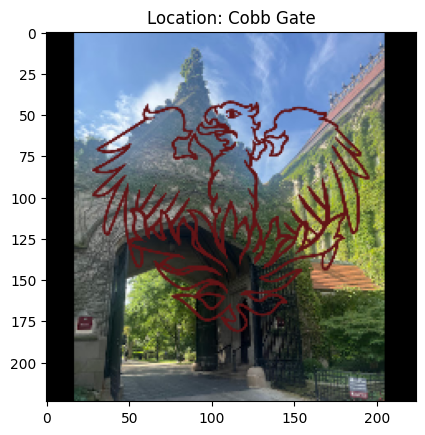

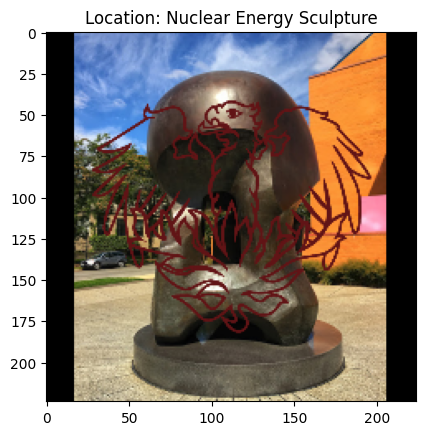

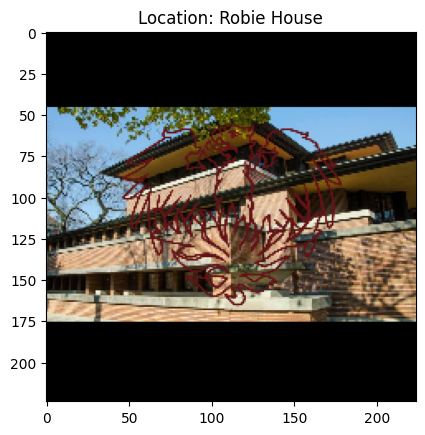

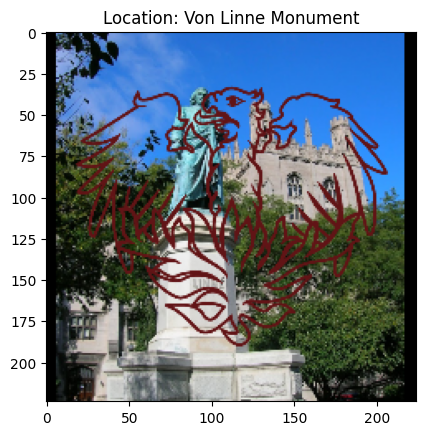

In [ ]:
# Predict on test dataset:
predictions = my_model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Get the file paths from the dataset (remove decode())
image_filenames = [element for element in test.file_paths]  # Remove decode()

# Iterate through filenames and the dataset
for i, (image, filename) in enumerate(zip(test.as_numpy_iterator(), image_filenames)):
    if predicted_classes[i] == 1:
        # Squeeze the image to remove the batch dimension
        image = image.squeeze(0)
        #loc_words = filename.split('/')[-1].split('.')[0].split('_')
        loc_name = ' '.join(word.capitalize() for word in filename.split('/')[-1].split('.')[0].split('_'))

        plt.imshow(image.astype("uint8"))
        plt.title(f"Location: {loc_name}")  # Use the filename for the title
        plt.show()